<a href="https://colab.research.google.com/github/NastasiaMazur/ML_all_notebooks/blob/main/02_Gender_Identification_with_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gender Idetification

Based on the nltk book: https://www.nltk.org/book/ch06.html

### Data Download

In [2]:
import nltk

In [4]:
nltk.download('names')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


True

### Import the names Data

In [5]:
from nltk.corpus import names

In [6]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')

# Data Exploration

The first step in every task is **always** (!!!) to look at your data.

The dataset contains about 8k names, mostly in English:

In [7]:
print(f'there are {len(male_names)} male names and {len(female_names)} female names')

there are 2943 male names and 5001 female names


In [8]:
male_names[:10]

['Aamir',
 'Aaron',
 'Abbey',
 'Abbie',
 'Abbot',
 'Abbott',
 'Abby',
 'Abdel',
 'Abdul',
 'Abdulkarim']

In [9]:
female_names[:10]

['Abagael',
 'Abagail',
 'Abbe',
 'Abbey',
 'Abbi',
 'Abbie',
 'Abby',
 'Abigael',
 'Abigail',
 'Abigale']

Some names can be either for boys or girls - Let's check how many of these names appear in both groups:

In [10]:
## YOUR TURN:
# Find which names are common for both male and females:


double_names = list(set(male_names).intersection(female_names))

print(f'in fact, there are {len(double_names)} names which are common to boys and girls: \n\n {double_names}')

in fact, there are 365 names which are common to boys and girls: 

 ['Regan', 'Hazel', 'Tate', 'Tommy', 'Gill', 'Lanny', 'Van', 'Shelley', 'Randi', 'Brooks', 'Barrie', 'Jodi', 'Pattie', 'Brook', 'Ronnie', 'Freddie', 'Allie', 'Nat', 'Alfie', 'Emmy', 'Demetris', 'Rey', 'Glenn', 'Fred', 'Lee', 'Adrien', 'Adrian', 'Erin', 'Robbie', 'Cam', 'Corrie', 'Gayle', 'Tabbie', 'Shayne', 'Cammy', 'Francis', 'Augustine', 'Bertie', 'Noel', 'Gerry', 'Sonnie', 'Virgie', 'George', 'Gerri', 'Joey', 'Rickie', 'Bernie', 'Clair', 'Saundra', 'Henrie', 'Willi', 'Denny', 'Kelsey', 'Wynn', 'Brandy', 'Cris', 'Lynn', 'Dionis', 'Jesse', 'Lonnie', 'Connie', 'Frankie', 'Judith', 'Nikki', 'Sean', 'Mickie', 'Marty', 'Maurise', 'Caryl', 'Freddy', 'Robin', 'Clemmie', 'Shane', 'Gabriel', 'Millicent', 'Tallie', 'Georgia', 'Morlee', 'Carmine', 'Sonny', 'Michele', 'Jessie', 'Marlo', 'Rene', 'Ginger', 'Andy', 'Vale', 'Carey', 'Meryl', 'Pooh', 'Donnie', 'Jodie', 'Kelley', 'Tobie', 'Kit', 'Ollie', 'Sascha', 'Winny', 'Jo', 'Lyn',

Our task is to identify the person's gender by a given name.

This task is a **Classification** task.

In classification, the model must choose the correct label from a fixed set of possible labels.
Examples of classification task include:

- Spam detection (spam/not spam)
- Assigning a topic to text (Politics, Spots, Economical)
- Detecting entity names (locations, people, companies) - also called Named Entity Recognition (NER)

A classifier is **supervised**, if it is trained using a set of correctly labeled pairs (X --> y).

![](https://raw.githubusercontent.com/liadmagen/NLP-Course/master/images/feature_extractor.png)

# 1. Classification with NLTK

Let's start with creating a classifier with the `nltk` package, which we got to know in the first exercise.

For this, we first create a small 'dataset' that combines both the female and the male names:

In [11]:
labeled_names = ([(name, 'male') for name in male_names] + [(name, 'female') for name in female_names])

Then, we shuffle the names. This is always a good idea to shuffle the data - not to teach our models to be expecting any order...

In [12]:
import random

random.shuffle(labeled_names)

Computers and machine learning models can't read. They don't understand the notion of words or characters. Ever character is represented by some number.

For example, the [ASCII code](https://www.ascii-code.com/) represents the letter 'A' as the number 65, and the letter 'a' as the number 97.
While in [Unicode](https://home.unicode.org/), "A" is represented by the code `U+0041` and "a" is represented by `U+0061`.

And yet, these numbers don't mean much. It doesn't represent a vowel or constant, a frequent letter sucha s 'e', versus a relatively 'new' letter in the alphabeth, such as "V" vs "U", or "Z"...

As linguists, we can use our language knowledge to craft new numeric features that represents better our data.

Think: Which features can you craft to represent the gender in a first name?
Also, You might want to visualize and explore the data with statistical tools to find feature ideas.

In [13]:
### YOUR TURN:
### Write a feature function that generate features to decide if a name if for male or female.
### Given a name (word), return a dictionary of such features

def gender_features(word: str) -> dict[str, float]:
    # Which feature can we use to detect the gender?
    # Craft at least one feature and return it as a feature dictionary
    return {'last_letter': word[-1]}

    #return {'our_awesoe_feature': 0 }


name = 'Anna'
features = gender_features(name)
print(features)


{'last_letter': 'a'}


Now that we have a feature function, let's use it to convert our dataset into numerical features, and train our first Machine Learning model:

In [16]:
feature_sets = [(gender_features(n), gender) for (n, gender) in labeled_names]

# We divide the dataset to create an 'exam' for the model:
train_set, test_set = feature_sets[500:], feature_sets[:500]

# And define and train the NLTK classifier
classifier = nltk.DecisionTreeClassifier.train(train_set)

In [17]:
for name in ["Bill", "Melissa", "Barack", "Michelle"]:
  result = classifier.classify(gender_features(name))
  print(f"the gender prediction for {name} is {result}")

the gender prediction for Bill is male
the gender prediction for Melissa is female
the gender prediction for Barack is male
the gender prediction for Michelle is female


In [18]:
print(nltk.classify.accuracy(classifier, test_set))

0.752


In [19]:
print(classifier.pretty_format())

last_letter= ? ........................................ female
last_letter=a? ........................................ female
last_letter=b? ........................................ male
last_letter=c? ........................................ male
last_letter=d? ........................................ male
last_letter=e? ........................................ female
last_letter=f? ........................................ male
last_letter=g? ........................................ male
last_letter=h? ........................................ female
last_letter=i? ........................................ female
last_letter=j? ........................................ male
last_letter=k? ........................................ male
last_letter=l? ........................................ male
last_letter=m? ........................................ male
last_letter=n? ........................................ male
last_letter=o? ........................................ male
last_letter=p?

# 2. Classification with Scikit-Learn

[Sci-Kit Learn](https://scikit-learn.org/stable/index.html) is an excellent package for machine learning and is widely used.
It offers many different models, for both supervised and unsupervised learning, as well as tools such as pipelines that enables us to combine models together (ensemble).

Let's use its Decision Tree model, together with metric tools to evaluate how well our model does:

In [20]:
import numpy as np

from sklearn import tree, utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt

label2idx = {'male':0, 'female': 1}
idx2label = {0: 'male', 1: 'female'}

We start by creating our dataset (X) and our prediction targets (y).

Our goal is to create a discriminative model: $f(X) → y$

In [21]:
X = male_names + female_names
y = [label2idx['male']] * len(male_names) + [label2idx['female']] * len(female_names)

Let's shuffle the data a bit:

In [22]:
X, y = utils.shuffle(X, y)

And divide our data into a training-set, and an unseen testing-set:

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [24]:
assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

And initialize our [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html):

In [25]:
clf = tree.DecisionTreeClassifier(max_depth=2, random_state=1234)

Now we need our Feature Function again.
Unlike NLTK, which requires a dictionary, with SKLearn, we need to return a list of features (a vector).

Here, we just return the last letter of the name as a feature. The python function [`ord`](https://docs.python.org/3/library/functions.html#ord) returns the unicode numerical code of the character.

In [26]:
def gender_feature_function(name):
    return ord(name[-1])

In [27]:
assert gender_feature_function("Željko") == 111

Now we can use our feature function and convert our data into numerical features:

In [28]:
X_train = list(map(gender_feature_function, X_train))
X_test = list(map(gender_feature_function, X_test))

In [29]:
X_train[:10]

[100, 109, 101, 110, 108, 105, 121, 114, 101, 115]

Before using our training data vector for training the model, we sometimes may need to reshape its structure. Specifically, instead of having it as a list of numbers, we want it as a "column" of numbers.

In [30]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

In [31]:
X_train.shape

(5958, 1)

Let's take a peek and ensure our data is in the way we want it to be:

In [32]:
print(list(zip(X_train[:5], y_train[:5])))

[(array([100]), 0), (array([109]), 0), (array([101]), 1), (array([110]), 0), (array([108]), 0)]


And finally, we are ready to train our model:

In [33]:
clf = clf.fit(X_train, y_train)

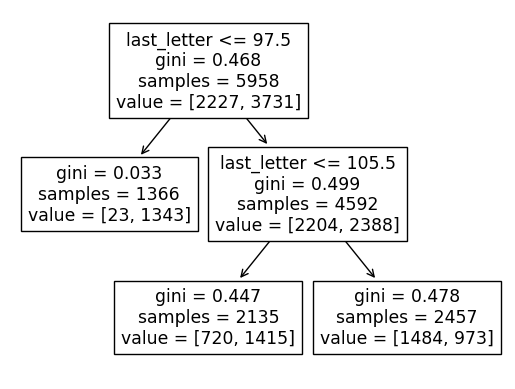

In [34]:
tree.plot_tree(clf, feature_names = ["last_letter"])
plt.show()

Now that we have a model, we can evaluate how well we did.

SKLearn has many different metrics to test our model. For classification tasks, the most common are:
- Precision
- Recall
- F-Score
- Area under curve (AUC)
- Mathew's Correlation Coefficience (MCC)

But many more exists, and it depends on the task in hand, to decide which one would represent our data bet.


Note: Be careful and don't blindly trust the metrics. Always be judgemental and stay critical about your results and achievements. Here's an excellent video about the topic - and why we should suspect our resutls: https://www.youtube.com/watch?v=r_V1pveRKoo

In [35]:
predictions = clf.predict(X_test)

In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.59      0.68      0.63       716
           1       0.80      0.73      0.77      1270

    accuracy                           0.71      1986
   macro avg       0.70      0.71      0.70      1986
weighted avg       0.73      0.71      0.72      1986



---

We can use [`graphviz`](https://graphviz.org/) to visualize the tree we trained, and understand which features are more important, and have more weight.

Graphviz creates an image of the tree, which looks something like this:

![](https://raw.githubusercontent.com/liadmagen/NLP-Course/master/images/DecisionTree.png)

In [37]:
import graphviz


dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                feature_names=['last_letter'],
                                class_names=["male", "female"],
                                filled=True,
                                rounded=True,
                               )
graph = graphviz.Source(dot_data)

In [38]:
graph.view()

'Source.gv.pdf'

## Excercise: Improve the results

With a naive last-letter feature, we got about an F-Score of ~71-73.
This is not great: 1 out of 4 names is wrongly classified.

How can we improve it further? which features can we craft?
1. Perform statistical analysis of the dataset: which letters are the most common for every gender, and in which position do they appear?
2. Create additional features and re-train the model. Can you score above 80%? above 90%? above 95%?

In [74]:
import numpy as np

from sklearn import tree, utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt

label2idx = {'male':0, 'female': 1}
idx2label = {0: 'male', 1: 'female'}

In [75]:
X = male_names + female_names
y = [label2idx['male']] * len(male_names) + [label2idx['female']] * len(female_names)

In [76]:
X, y = utils.shuffle(X, y)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [78]:
assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

In [79]:
clf = tree.DecisionTreeClassifier(max_depth=2, random_state=1234)

In [81]:
def gender_features1(word: str) -> dict[str, float]:
  return {'suffix1': word[-1:], 'suffix2': word[-2:]}


name = 'Anna'
features = gender_features1(name)
print(features)

{'suffix1': 'a', 'suffix2': 'na'}


In [64]:
def gender_features2(name):
  features = {}
  features["first_letter"] = name[0].lower()
  features["last_letter"] = name[-1].lower()
  for letter in 'abcdefghijklmnopqrstuvwxyz':
    features["count({})".format(letter)] = name.lower().count(letter)
    features["has({})".format(letter)] = (letter in name.lower())
  return features

print(gender_features2('John'))

{'first_letter': 'j', 'last_letter': 'n', 'count(a)': 0, 'has(a)': False, 'count(b)': 0, 'has(b)': False, 'count(c)': 0, 'has(c)': False, 'count(d)': 0, 'has(d)': False, 'count(e)': 0, 'has(e)': False, 'count(f)': 0, 'has(f)': False, 'count(g)': 0, 'has(g)': False, 'count(h)': 1, 'has(h)': True, 'count(i)': 0, 'has(i)': False, 'count(j)': 1, 'has(j)': True, 'count(k)': 0, 'has(k)': False, 'count(l)': 0, 'has(l)': False, 'count(m)': 0, 'has(m)': False, 'count(n)': 1, 'has(n)': True, 'count(o)': 1, 'has(o)': True, 'count(p)': 0, 'has(p)': False, 'count(q)': 0, 'has(q)': False, 'count(r)': 0, 'has(r)': False, 'count(s)': 0, 'has(s)': False, 'count(t)': 0, 'has(t)': False, 'count(u)': 0, 'has(u)': False, 'count(v)': 0, 'has(v)': False, 'count(w)': 0, 'has(w)': False, 'count(x)': 0, 'has(x)': False, 'count(y)': 0, 'has(y)': False, 'count(z)': 0, 'has(z)': False}


In [82]:
#assert first_letter_feature("Željko") == 381
#assert last_two_letters_feature("Željko") == (107, 111)
#assert vowel_count_feature("John") == 1
#assert consonant_count_feature("John") == 3

In [83]:
X_train = list(map(gender_feature_function, X_train))
X_test = list(map(gender_feature_function, X_test))

In [84]:
X_train[:10]

[105, 97, 121, 111, 108, 101, 97, 97, 97, 121]

In [85]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

In [86]:
X_train.shape

(5958, 1)

In [87]:
print(list(zip(X_train[:5], y_train[:5])))

[(array([105]), 1), (array([97]), 1), (array([121]), 1), (array([111]), 1), (array([108]), 0)]


In [88]:
clf = clf.fit(X_train, y_train)

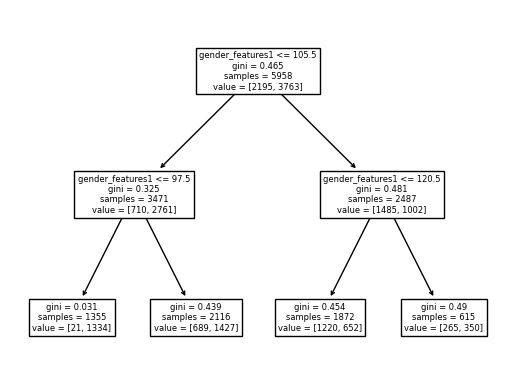

In [89]:
tree.plot_tree(clf, feature_names = ["gender_features1"])
plt.show()

In [90]:
predictions = clf.predict(X_test)

In [91]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.55      0.60       748
           1       0.75      0.84      0.80      1238

    accuracy                           0.73      1986
   macro avg       0.72      0.69      0.70      1986
weighted avg       0.72      0.73      0.72      1986

